#**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score

#**Import Dataset**

In [2]:
#df = pd.read_csv("Heart_Disease_Project/data/heart_disease.csv")
df = pd.read_csv("/content/heart_disease_selected.csv")
df.head()

,sex,cp,thalach,exang,oldpeak,slope,ca,thal,target
0,1,1,150.0,0,2.3,3,0.0,6.0,0
1,1,4,108.0,1,1.5,2,2.5,3.0,1
2,1,4,129.0,1,2.6,2,2.0,7.0,1
3,1,3,187.0,0,3.5,3,0.0,3.0,0
4,0,2,172.0,0,1.4,1,0.0,3.0,0


#**Checking Nulls**

In [3]:
df.isnull().sum()

,0
sex,0
cp,0
thalach,0
exang,0
oldpeak,0
slope,0
ca,0
thal,0
target,0


#**Data Preparation**

In [4]:
X = df.drop('target', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# EDA

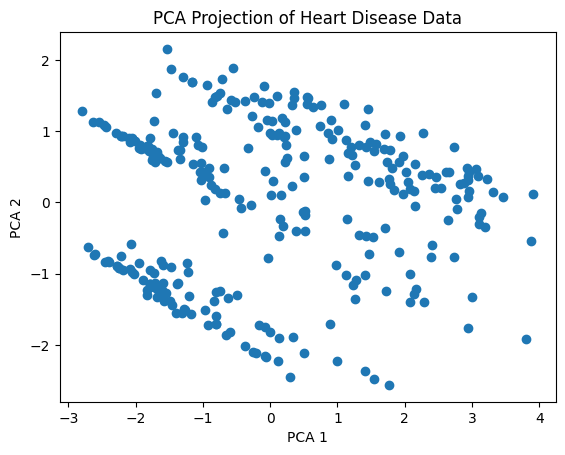

In [6]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA Projection of Heart Disease Data')
plt.show()

#**K-Mean**

In [7]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['KMeans_Cluster'] = clusters

In [8]:
score = silhouette_score(X_scaled, clusters)
print("KMeans Silhouette Score:", score)

KMeans Silhouette Score: 0.257606311834214


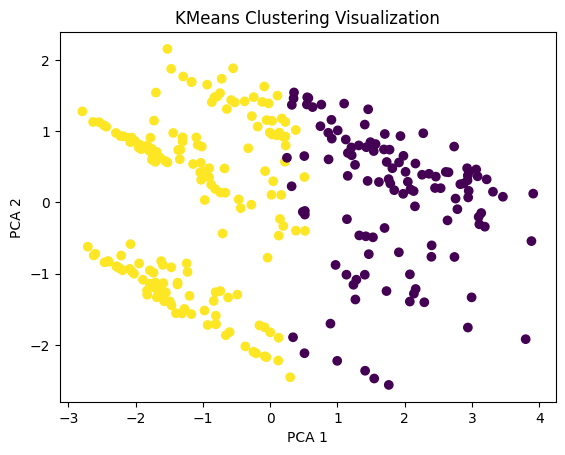

In [9]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('KMeans Clustering Visualization')
plt.show()

#**DBSCAN (Density-Based)**

In [10]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(X_scaled)
df['DBSCAN_Cluster'] = dbscan_clusters

In [11]:
score = silhouette_score(X_scaled, dbscan_clusters)
print("DBSCAN Silhouette Score:", score)

DBSCAN Silhouette Score: 0.12438618453822645


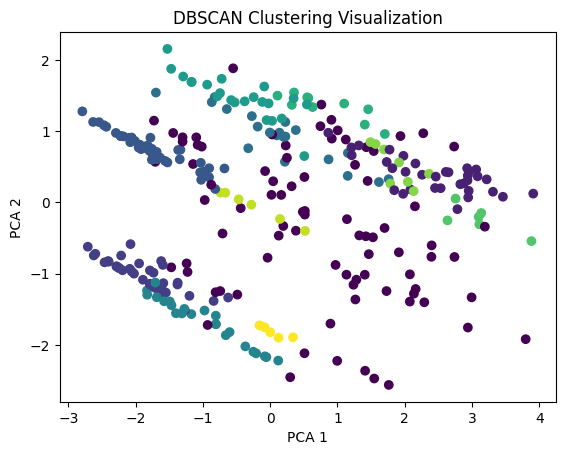

In [12]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=dbscan_clusters, cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('DBSCAN Clustering Visualization')
plt.show()